In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [4]:
train = pd.read_csv('data/sign_mnist_train.csv', sep=',')
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [5]:
test = pd.read_csv('data/sign_mnist_test.csv', sep=',')
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [6]:
class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [7]:
print(f'Duplicados (train): {train.duplicated().sum()}')
print(f'Duplicados (test): {test.duplicated().sum()}')

Duplicados (train): 0
Duplicados (test): 0


In [8]:
print(f'Nulos (train):\n{train.isna().sum()}\n')
print(f'Nulos (test):\n{test.isna().sum()}')

Nulos (train):
label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

Nulos (test):
label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [9]:
x_train = train.drop("label", axis=1)
y_train = train["label"]

In [10]:
x_test = test.drop("label", axis=1)
y_test = test["label"]

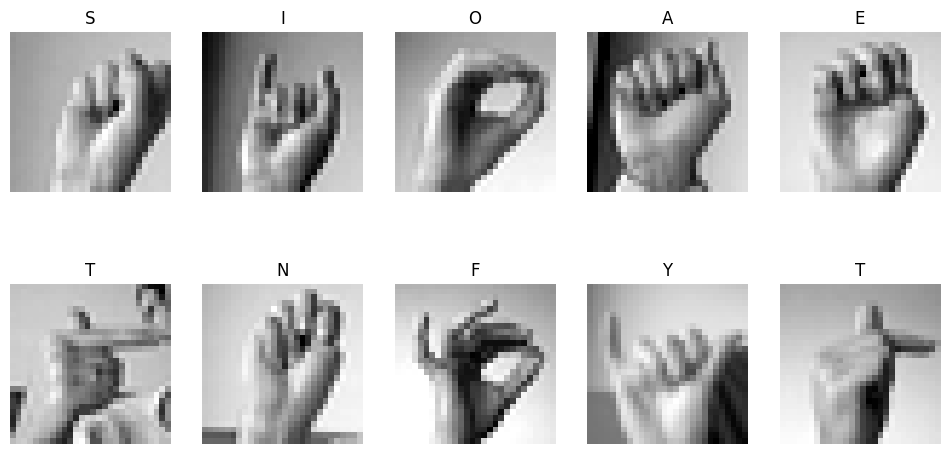

In [11]:
random_sample = np.random.randint(0, len(train) + 1, size=10)

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train.iloc[random_sample[i]].values.reshape(28, 28), cmap='gray')
    plt.title(class_names[y_train[random_sample[i]]])
    plt.axis('off')
plt.show()

In [12]:
standard_scaler = StandardScaler()
scaled_x_train = standard_scaler.fit_transform(x_train)
x_train = pd.DataFrame(scaled_x_train, columns=x_train.columns)
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,-0.928951,-0.763625,-0.620852,-0.506458,-0.463774,-0.426610,-0.413304,-0.366583,-0.335512,-0.304798,...,1.033649,0.908302,0.833111,0.751478,0.690817,0.681926,0.678557,0.664063,0.658113,0.654939
1,0.231652,0.212805,0.121680,0.063570,-0.005683,-0.039066,-0.127718,-0.128922,-0.182377,-0.272827,...,-1.131056,0.022964,-0.393098,-1.132135,-1.066399,0.004150,0.190430,-0.931575,-0.410913,-0.168097
2,1.005388,0.988941,0.941025,0.866793,0.829661,0.763704,0.757597,0.762307,0.705804,0.654322,...,0.955217,0.816715,0.724459,0.625904,0.565302,0.571590,0.552589,0.521877,0.516625,0.546237
3,1.585689,1.564785,1.555534,1.514553,1.476378,1.428065,1.443003,1.415875,1.410223,1.453589,...,1.472864,1.320442,1.236673,1.128201,1.067364,0.997170,0.977732,0.948434,1.066859,0.049309
4,0.449265,0.463171,0.480144,0.478137,0.533248,0.569932,0.557687,0.643477,0.644550,0.654322,...,-0.770272,-0.648672,-0.750095,-0.802503,-0.454511,0.004150,-0.092998,0.016328,0.044995,0.297773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,1.053746,1.013978,0.992234,0.944524,0.964393,0.957476,0.928949,0.910845,0.889565,0.910087,...,-0.142821,0.267195,-0.843225,-1.289103,-1.725356,0.587352,1.119446,0.600869,0.956812,1.012106
27451,0.134935,0.137695,0.147285,0.115391,0.102103,0.071661,0.072192,0.049324,0.062638,0.046879,...,0.892472,0.770922,0.693416,0.610207,0.565302,0.524303,0.505351,0.521877,0.532346,0.530708
27452,0.691058,0.638428,0.582562,0.529958,0.479355,0.459205,0.414895,0.346400,0.277027,0.238703,...,-0.315370,0.740393,0.864154,0.767175,0.690817,0.650401,0.631319,0.632466,0.610950,0.623881
27453,0.763595,0.813685,0.838607,0.814972,0.829661,0.846749,0.843273,0.851430,0.828311,0.782205,...,-0.346743,-1.396630,-1.960782,-1.587342,-0.940884,-1.319876,-1.825062,-1.547713,-1.165521,-1.037721


In [13]:
scaled_x_test = standard_scaler.transform(x_test)
x_test = pd.DataFrame(scaled_x_test, columns=x_test.columns)
x_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.086577,0.012511,-0.031947,-0.091892,-0.167362,-0.205156,-0.270511,-0.366583,-0.396766,-0.432681,...,-0.048704,0.007699,-0.408619,-1.100742,-1.254673,-1.051918,-0.896046,-0.789390,-0.646728,-0.820315
1,-0.469546,-0.513258,-0.518433,-0.558279,-0.625454,-0.675746,-0.727448,-0.812197,-0.856169,-0.880270,...,-1.476154,-0.663937,0.631330,0.374755,0.377029,0.335157,0.332145,0.348095,0.327973,0.313302
2,-1.460894,-1.514725,-1.517010,-1.491054,-1.379957,-0.980244,-0.727448,-0.574536,-0.519273,-0.432681,...,-1.146742,0.282459,1.376368,1.065414,1.067364,1.012932,0.993478,0.995829,0.988254,0.965519
3,1.392255,1.414565,1.427512,1.359090,1.368592,1.400384,1.414445,1.386167,1.410223,1.389647,...,0.202277,1.534144,1.453976,1.395046,1.428221,1.154792,1.056462,1.232805,1.444162,1.477976
4,1.029567,1.064051,1.069048,1.074076,1.153019,1.178930,1.185976,1.207922,1.195834,1.197823,...,-1.805566,-1.640861,-1.386482,-1.744310,-2.086213,-1.840029,-1.793570,-1.832084,-1.810081,-1.658881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,-0.251933,-0.738588,-1.107338,-1.335591,-1.379957,-1.644606,-2.840783,-1.762841,-1.315573,-1.040123,...,-0.519292,-0.541821,-0.579357,-0.708322,-0.689853,0.272108,0.332145,0.221708,0.092158,0.049309
7168,0.280011,0.262878,0.249703,0.270854,0.263783,0.210070,0.300660,0.346400,0.338281,0.334615,...,1.127766,0.999888,0.926241,0.861355,0.800644,0.760737,0.741542,0.758853,0.752439,0.748113
7169,1.077925,1.064051,0.992234,0.970434,0.910500,0.874431,0.900390,0.881138,0.828311,0.846146,...,1.174825,1.030417,0.926241,0.861355,0.816333,0.792261,0.741542,0.774651,0.752439,0.748113
7170,1.343897,1.414565,1.453116,1.436821,1.557218,1.594156,1.642913,1.802074,1.900254,2.029061,...,-0.456547,0.328253,1.578149,1.504923,1.177190,-0.783961,-1.132237,-1.500318,-1.432777,-1.503591


In [14]:
pca = PCA(n_components=0.95)
x_train_reduced = pca.fit_transform(x_train)

In [15]:
x_test_reduced = pca.transform(x_test)

In [16]:
knn = KNeighborsClassifier()

In [17]:
param_grid = {'n_neighbors': [5, 10, 15],
              'weights': ['uniform', 'distance']}

In [18]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [19]:
grid = GridSearchCV(knn, param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)

In [20]:
grid.fit(x_train_reduced, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [21]:
print("Mejores parámetros: {}".format(grid.best_params_)) 

Mejores parámetros: {'n_neighbors': 5, 'weights': 'distance'}


In [22]:
mejor_modelo = grid.best_estimator_

In [23]:
y_pred = mejor_modelo.predict(x_test_reduced)

In [24]:
class_names.remove('J')
class_names.remove('Z')

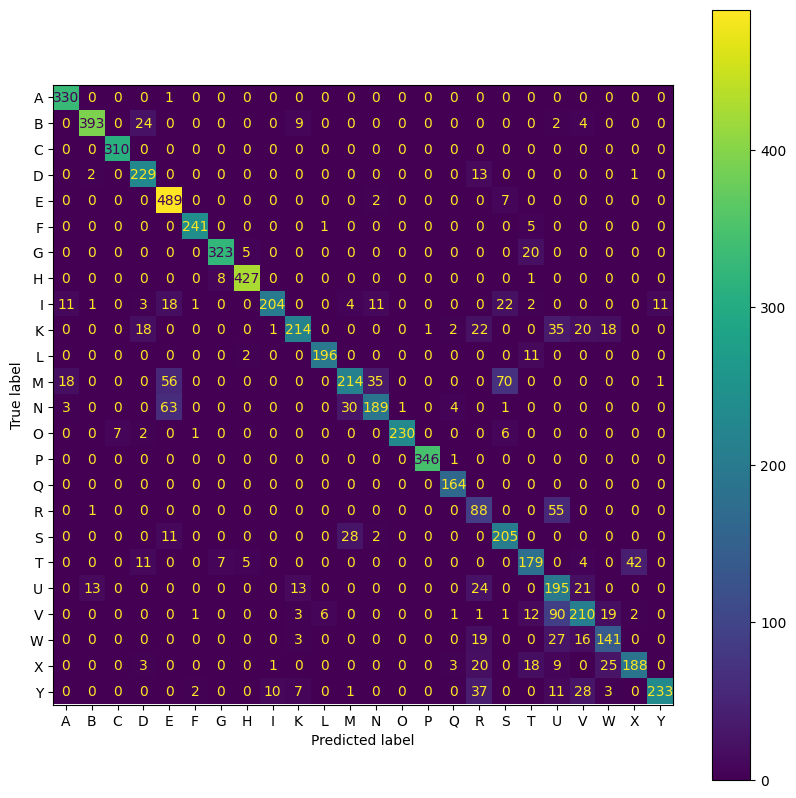

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax)

In [26]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           A       0.91      1.00      0.95       331
           B       0.96      0.91      0.93       432
           C       0.98      1.00      0.99       310
           D       0.79      0.93      0.86       245
           E       0.77      0.98      0.86       498
           F       0.98      0.98      0.98       247
           G       0.96      0.93      0.94       348
           H       0.97      0.98      0.98       436
           I       0.94      0.71      0.81       288
           K       0.86      0.65      0.74       331
           L       0.97      0.94      0.95       209
           M       0.77      0.54      0.64       394
           N       0.79      0.65      0.71       291
           O       1.00      0.93      0.96       246
           P       1.00      1.00      1.00       347
           Q       0.94      1.00      0.97       164
           R       0.39      0.61      0.48       144
           S       0.66    

In [27]:
random_int = np.random.randint(0, len(test) + 1)
random_sample = test.iloc[random_int]
random_sample

label        17
pixel1      188
pixel2      191
pixel3      194
pixel4      196
           ... 
pixel780     61
pixel781     74
pixel782    103
pixel783     77
pixel784     38
Name: 1960, Length: 785, dtype: int64

In [29]:
x_sample = random_sample.drop('label')
y_sample = random_sample['label']

In [30]:
x_sample_scaled = standard_scaler.transform([x_sample])
x_sample_reduced = pca.transform(x_sample_scaled)
x_sample_reduced

/Users/I864098/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/I864098/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[ 2.89002922e+01,  1.20027646e+01, -1.14273456e+01,
         2.83455371e+00, -7.29440672e+00,  3.23578283e+00,
         6.39936248e+00,  5.41881200e+00, -2.30816410e+00,
        -5.00071651e-03, -3.90670915e+00,  5.12607581e+00,
         1.34098013e+00,  3.47894371e+00, -8.08208735e-01,
         2.09073571e+00, -7.85934444e-01,  2.00314216e+00,
         1.14418309e+00, -5.59456710e-02, -1.07296045e+00,
         1.19738827e+00, -6.86328474e-01, -1.30869615e+00,
        -4.72511763e+00,  1.05224851e+00, -3.00171881e-01,
         1.14235463e+00,  8.57245368e-01, -1.96948810e+00,
         2.02394911e+00,  1.00243172e+00,  9.05546956e-01,
        -1.71345785e+00, -1.16092966e+00,  6.99739867e-01,
         1.15945239e+00,  4.11559229e-01, -6.56098833e-01,
        -1.45188121e+00,  4.78338001e-01,  8.01227956e-01,
        -6.73328947e-01, -2.85094979e+00,  1.76645793e-01,
        -5.40731406e-01,  1.52775768e+00,  1.43525834e+00,
         1.40414219e-01, -2.32132502e+00, -4.04651755e-0

In [31]:
y_sample_pred = mejor_modelo.predict(x_sample_reduced)[0]
y_sample_pred

17

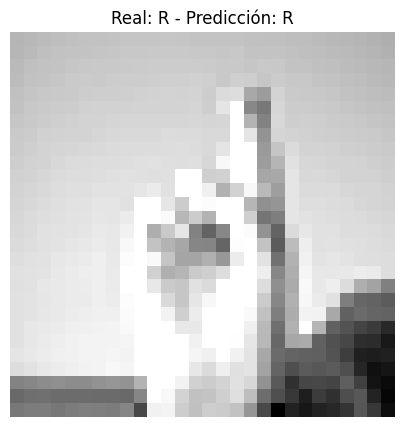

In [32]:
class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
plt.figure(figsize=(5, 5))
plt.imshow(x_sample.values.reshape(28, 28), cmap='gray')
plt.title(f'Real: {class_names[y_sample]} - Predicción: {class_names[y_sample_pred]}')
plt.axis('off')
plt.show()